# eCommerce Order Analysis

The appropriate recommendations are dependent on the established KPIs. However, this process will be explored in further iterations of this project, in different notebooks.

This notebook focuses on gathering high-level understanding of the orders including but not limited to answering:
* What were the most ordered items?
* Who were the most loyal customers?
* What was the average spend per customer?
* Is there a seasonality to orders?
* What are the most profilic traffic sources that lead to conversion?

Order Exploration
We'll start this exploration by investigating products that are most ordered, order frequency and information about the ordering process. Some questions we aim to answer here are:

What was the highest selling product?
How often was this product ordered?
How much revenue did the top products bring in?
Is there a seasonality or trend associated with this product?

In [ ]:
!pip install geopandas

In [ ]:
!pip install 'geopandas[all]'

In [ ]:
!pip install geodatasets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#geopandas
import geopandas as gpd
from shapely import wkt
from geodatasets import get_path

In [5]:
orders = pd.read_csv('/content/drive/MyDrive/2024BusinessAnalysisProject/Data/UsersOrders.csv')

In [6]:
orders.head()

,Unnamed: 0,id,first_name,last_name,email,age,gender,state,street_address,postal_code,...,traffic_source,created_at,user_geom,order_id,user_id,status,gender_1,created_at_1,shipped_at,num_of_item
0,0,43158,John,Christensen,johnchristensen@example.com,17,M,Acre,5948 Goodman Union Suite 281,69980-000,...,Display,2019-10-28 10:05:00+00:00,POINT(-72.87094866 -8.065346116),53699,43158,Complete,M,2023-11-28 10:05:00+00:00,2023-11-30 00:51:00+00:00,1
1,1,20002,Lisa,Benton,lisabenton@example.org,60,F,Acre,892 Herman Drive Suite 544,69980-000,...,Search,2021-03-12 04:10:00+00:00,POINT(-72.87094866 -8.065346116),24826,20002,Processing,F,2024-02-24 04:10:00+00:00,NaN,1
2,2,79621,Alexandria,Rodriguez,alexandriarodriguez@example.com,23,F,Acre,92083 Bradford Pass Apt. 622,69980-000,...,Search,2023-10-06 17:54:00+00:00,POINT(-72.87094866 -8.065346116),99312,79621,Returned,F,2024-08-17 17:54:00+00:00,2024-08-18 16:56:00+00:00,1
3,3,67295,Edward,Riggs,edwardriggs@example.org,57,M,Acre,7705 Meyer Causeway,69980-000,...,Search,2019-04-24 14:59:00+00:00,POINT(-72.87094866 -8.065346116),83915,67295,Complete,M,2021-10-04 14:59:00+00:00,2021-10-06 02:34:00+00:00,1
4,4,27421,Steven,Bolton,stevenbolton@example.com,43,M,Acre,7982 David Oval Apt. 145,69980-000,...,Search,2021-11-30 00:46:00+00:00,POINT(-72.87094866 -8.065346116),34018,27421,Complete,M,2024-01-02 00:46:00+00:00,2024-01-03 20:08:00+00:00,1


In [7]:
orders.columns

Index(['Unnamed: 0', 'id', 'first_name', 'last_name', 'email', 'age', 'gender',
       'state', 'street_address', 'postal_code', 'city', 'country', 'latitude',
       'longitude', 'traffic_source', 'created_at', 'user_geom', 'order_id',
       'user_id', 'status', 'gender_1', 'created_at_1', 'shipped_at',
       'num_of_item'],
      dtype='object')

In [8]:
orders.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
orders.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,traffic_source,created_at,user_geom,order_id,user_id,status,gender_1,created_at_1,shipped_at,num_of_item
0,43158,John,Christensen,johnchristensen@example.com,17,M,Acre,5948 Goodman Union Suite 281,69980-000,NaN,...,Display,2019-10-28 10:05:00+00:00,POINT(-72.87094866 -8.065346116),53699,43158,Complete,M,2023-11-28 10:05:00+00:00,2023-11-30 00:51:00+00:00,1
1,20002,Lisa,Benton,lisabenton@example.org,60,F,Acre,892 Herman Drive Suite 544,69980-000,NaN,...,Search,2021-03-12 04:10:00+00:00,POINT(-72.87094866 -8.065346116),24826,20002,Processing,F,2024-02-24 04:10:00+00:00,NaN,1
2,79621,Alexandria,Rodriguez,alexandriarodriguez@example.com,23,F,Acre,92083 Bradford Pass Apt. 622,69980-000,NaN,...,Search,2023-10-06 17:54:00+00:00,POINT(-72.87094866 -8.065346116),99312,79621,Returned,F,2024-08-17 17:54:00+00:00,2024-08-18 16:56:00+00:00,1
3,67295,Edward,Riggs,edwardriggs@example.org,57,M,Acre,7705 Meyer Causeway,69980-000,NaN,...,Search,2019-04-24 14:59:00+00:00,POINT(-72.87094866 -8.065346116),83915,67295,Complete,M,2021-10-04 14:59:00+00:00,2021-10-06 02:34:00+00:00,1
4,27421,Steven,Bolton,stevenbolton@example.com,43,M,Acre,7982 David Oval Apt. 145,69980-000,NaN,...,Search,2021-11-30 00:46:00+00:00,POINT(-72.87094866 -8.065346116),34018,27421,Complete,M,2024-01-02 00:46:00+00:00,2024-01-03 20:08:00+00:00,1


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124747 entries, 0 to 124746
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              124747 non-null  int64  
 1   first_name      124747 non-null  object 
 2   last_name       124747 non-null  object 
 3   email           124747 non-null  object 
 4   age             124747 non-null  int64  
 5   gender          124747 non-null  object 
 6   state           124747 non-null  object 
 7   street_address  124747 non-null  object 
 8   postal_code     124747 non-null  object 
 9   city            123552 non-null  object 
 10  country         124747 non-null  object 
 11  latitude        124747 non-null  float64
 12  longitude       124747 non-null  float64
 13  traffic_source  124747 non-null  object 
 14  created_at      124747 non-null  object 
 15  user_geom       124747 non-null  object 
 16  order_id        124747 non-null  int64  
 17  user_id   

#### Data Cleaning:

In [11]:
orders.isna().sum()

,0
id,0
first_name,0
last_name,0
email,0
age,0
gender,0
state,0
street_address,0
postal_code,0
city,1195


We have missing values in the columns `shipped_at` and `city`.  

In [12]:
orders.duplicated().sum()

0

In [ ]:
# We have columns that have duplicate information
orders.drop(columns=['user_id', 'gender_1', 'created_at_1'], inplace=True)

All of the orders in the data are unique.

In [14]:
orders['order_id'].duplicated().sum()

0

There are duplicate or repeat users that have placed multiple orders.

In [15]:
orders['user_id'].duplicated().sum()

45034

**Let's explore those missing values:**

In [16]:
totalMissing = orders['city'].isna().sum()
print(totalMissing)
orders['city'].isna().mean() * 100

1195


0.9579388682693772

In [17]:
orders['shipped_at'].isna().mean() * 100

34.82809205832606

We're missing ~1% of the data for the column `city` and ~35% of the `shipped_at`.

In [18]:
orders['city'].nunique()

7619

In [19]:
orders['city'].value_counts().head(5)

,count
city,
Shanghai,2989
Beijing,2593
Seoul,1921
Shenzhen,1689
Dongguan,1127


In [20]:
missingCity = orders[orders['city'].isna()]
missingCity.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,latitude,longitude,traffic_source,created_at,user_geom,order_id,user_id,status,shipped_at,num_of_item
0,43158,John,Christensen,johnchristensen@example.com,17,M,Acre,5948 Goodman Union Suite 281,69980-000,NaN,...,-8.065346,-72.870949,Display,2019-10-28 10:05:00+00:00,POINT(-72.87094866 -8.065346116),53699,43158,Complete,2023-11-30 00:51:00+00:00,1
1,20002,Lisa,Benton,lisabenton@example.org,60,F,Acre,892 Herman Drive Suite 544,69980-000,NaN,...,-8.065346,-72.870949,Search,2021-03-12 04:10:00+00:00,POINT(-72.87094866 -8.065346116),24826,20002,Processing,NaN,1
2,79621,Alexandria,Rodriguez,alexandriarodriguez@example.com,23,F,Acre,92083 Bradford Pass Apt. 622,69980-000,NaN,...,-8.065346,-72.870949,Search,2023-10-06 17:54:00+00:00,POINT(-72.87094866 -8.065346116),99312,79621,Returned,2024-08-18 16:56:00+00:00,1
3,67295,Edward,Riggs,edwardriggs@example.org,57,M,Acre,7705 Meyer Causeway,69980-000,NaN,...,-8.065346,-72.870949,Search,2019-04-24 14:59:00+00:00,POINT(-72.87094866 -8.065346116),83915,67295,Complete,2021-10-06 02:34:00+00:00,1
4,27421,Steven,Bolton,stevenbolton@example.com,43,M,Acre,7982 David Oval Apt. 145,69980-000,NaN,...,-8.065346,-72.870949,Search,2021-11-30 00:46:00+00:00,POINT(-72.87094866 -8.065346116),34018,27421,Complete,2024-01-03 20:08:00+00:00,1


In [21]:
missingCity['country'].nunique()

6

In [22]:
missingCity['country'].value_counts()

,count
country,
Brasil,852
United States,212
Spain,54
South Korea,47
China,28
Germany,2


The missing values are from the Brasil, United States, Spain, South Korea, China and Germany. We'll need to investigate the states and impute the cities of the missing values accordingly.

In [ ]:
missingCity['state'].value_counts()

In [24]:
orders[orders['state'] == 'Pará']['postal_code'].nunique()

76

Are the coordinate the same for the missing values?

In [25]:
orders[(orders['state'] == 'Pará') & (orders['city'].isna())]

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,latitude,longitude,traffic_source,created_at,user_geom,order_id,user_id,status,shipped_at,num_of_item
86135,11528,Elizabeth,Chung,elizabethchung@example.net,14,F,Pará,6177 Mcdaniel Pine Apt. 630,68250-000,NaN,...,-0.171398,-55.688365,Search,2023-08-08 15:33:00+00:00,POINT(-55.68836513 -0.1713982778),14310,11528,Complete,2024-10-31 15:43:00+00:00,1
86136,11528,Elizabeth,Chung,elizabethchung@example.net,14,F,Pará,6177 Mcdaniel Pine Apt. 630,68250-000,NaN,...,-0.171398,-55.688365,Search,2023-08-08 15:33:00+00:00,POINT(-55.68836513 -0.1713982778),14309,11528,Processing,NaN,1
86137,11528,Elizabeth,Chung,elizabethchung@example.net,14,F,Pará,6177 Mcdaniel Pine Apt. 630,68250-000,NaN,...,-0.171398,-55.688365,Search,2023-08-08 15:33:00+00:00,POINT(-55.68836513 -0.1713982778),14311,11528,Shipped,2023-11-13 14:18:00+00:00,2
86138,70041,Rachel,King,rachelking@example.com,21,F,Pará,6044 Diane Ports,68250-000,NaN,...,-0.171398,-55.688365,Search,2019-11-05 14:24:00+00:00,POINT(-55.68836513 -0.1713982778),87338,70041,Returned,2021-04-27 07:36:00+00:00,1
86139,70041,Rachel,King,rachelking@example.com,21,F,Pará,6044 Diane Ports,68250-000,NaN,...,-0.171398,-55.688365,Search,2019-11-05 14:24:00+00:00,POINT(-55.68836513 -0.1713982778),87339,70041,Returned,2020-10-12 04:11:00+00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87585,71131,Sandra,Sanders,sandrasanders@example.org,22,F,Pará,81695 Roy Estate,68617-000,NaN,...,-1.981979,-46.436370,Search,2024-03-31 04:04:00+00:00,POINT(-46.43637028 -1.981978652),88722,71131,Processing,NaN,1
87586,71131,Sandra,Sanders,sandrasanders@example.org,22,F,Pará,81695 Roy Estate,68617-000,NaN,...,-1.981979,-46.436370,Search,2024-03-31 04:04:00+00:00,POINT(-46.43637028 -1.981978652),88723,71131,Returned,2024-06-09 06:41:00+00:00,4
87587,71131,Sandra,Sanders,sandrasanders@example.org,22,F,Pará,81695 Roy Estate,68617-000,NaN,...,-1.981979,-46.436370,Search,2024-03-31 04:04:00+00:00,POINT(-46.43637028 -1.981978652),88721,71131,Shipped,2024-04-03 11:23:00+00:00,1
87588,86889,Jacob,Hodges,jacobhodges@example.net,55,M,Pará,019 Ryan Shores,68617-000,NaN,...,-1.981979,-46.436370,Facebook,2023-11-03 03:40:00+00:00,POINT(-46.43637028 -1.981978652),108457,86889,Complete,2024-04-07 14:17:00+00:00,1


It is easier to gather the information about the location of our missing values by plotting them on a map instead:

In [26]:
# converting our coordinates into geometric objects
from shapely import wkt

missingCity["user_geom"] = gpd.GeoSeries.from_wkt(missingCity["user_geom"])

<ipython-input-26-60fedd5d0397>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missingCity["user_geom"] = gpd.GeoSeries.from_wkt(missingCity["user_geom"])


In [27]:
missingCity["user_geom"]

,user_geom
0,POINT (-72.87095 -8.06535)
1,POINT (-72.87095 -8.06535)
2,POINT (-72.87095 -8.06535)
3,POINT (-72.87095 -8.06535)
4,POINT (-72.87095 -8.06535)
...,...
118618,POINT (-120.41382 47.01293)
118619,POINT (-120.41382 47.01293)
118620,POINT (-120.41382 47.01293)
118621,POINT (-120.41382 47.01293)


Successfully converted the `user_geom` column into a geometry object.

In [28]:
gdf = gpd.GeoDataFrame(missingCity, geometry="user_geom")
gdf.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,latitude,longitude,traffic_source,created_at,user_geom,order_id,user_id,status,shipped_at,num_of_item
0,43158,John,Christensen,johnchristensen@example.com,17,M,Acre,5948 Goodman Union Suite 281,69980-000,NaN,...,-8.065346,-72.870949,Display,2019-10-28 10:05:00+00:00,POINT (-72.87095 -8.06535),53699,43158,Complete,2023-11-30 00:51:00+00:00,1
1,20002,Lisa,Benton,lisabenton@example.org,60,F,Acre,892 Herman Drive Suite 544,69980-000,NaN,...,-8.065346,-72.870949,Search,2021-03-12 04:10:00+00:00,POINT (-72.87095 -8.06535),24826,20002,Processing,NaN,1
2,79621,Alexandria,Rodriguez,alexandriarodriguez@example.com,23,F,Acre,92083 Bradford Pass Apt. 622,69980-000,NaN,...,-8.065346,-72.870949,Search,2023-10-06 17:54:00+00:00,POINT (-72.87095 -8.06535),99312,79621,Returned,2024-08-18 16:56:00+00:00,1
3,67295,Edward,Riggs,edwardriggs@example.org,57,M,Acre,7705 Meyer Causeway,69980-000,NaN,...,-8.065346,-72.870949,Search,2019-04-24 14:59:00+00:00,POINT (-72.87095 -8.06535),83915,67295,Complete,2021-10-06 02:34:00+00:00,1
4,27421,Steven,Bolton,stevenbolton@example.com,43,M,Acre,7982 David Oval Apt. 145,69980-000,NaN,...,-8.065346,-72.870949,Search,2021-11-30 00:46:00+00:00,POINT (-72.87095 -8.06535),34018,27421,Complete,2024-01-03 20:08:00+00:00,1


Plotting missing values:

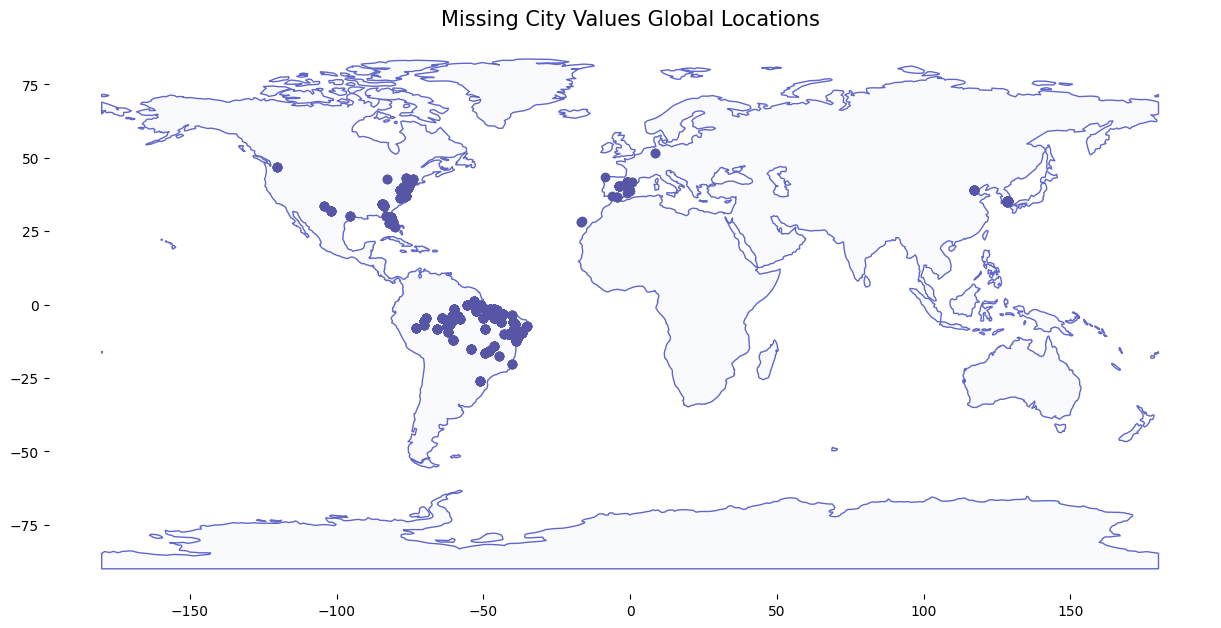

In [31]:
world = gpd.read_file(get_path("naturalearth.land"))

ax = world.plot(color="#F9FAFE", figsize=(15, 25), edgecolor="#6167C9")
gdf.plot(ax=ax, figsize=(10, 15), color="#5756A6")
ax.set_title('Missing City Values Global Locations', fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

From our map above, we can see that most of the data points for missing values are concetrated in Brasil. The values are scattered throughout different locations in the northern region of the country. There are also missing values from other parts of the world such as US, Spain, and South Korea. Given the spread of the values and that we would need to update each value individually, we are going to opt for imputing the missing city values as 'city unknown' instead.

In [32]:
orders['city'] = orders['city'].fillna('city_unknown')
orders['city'].isna().sum()

0

We have now resolved for missing city values. Let's inspect the column `shipped_at`. Recall that we are missing ~35% of values in this column.

In [33]:
shippedna = orders['shipped_at'].isna().mean()*100
print(f'We are missing about {shippedna}% of the values for the column `shipped_at`.')

We are missing about 34.82809205832606% of the values for the column `shipped_at`.


In [34]:
# let's impute these values with 'shipped_at_unknown'
orders['shipped_at'] = orders['shipped_at'].fillna('shipped_at_unknown')
orders['shipped_at'].isna().sum()

0

### Exploratory Data Analysis:

#### How many items per order?



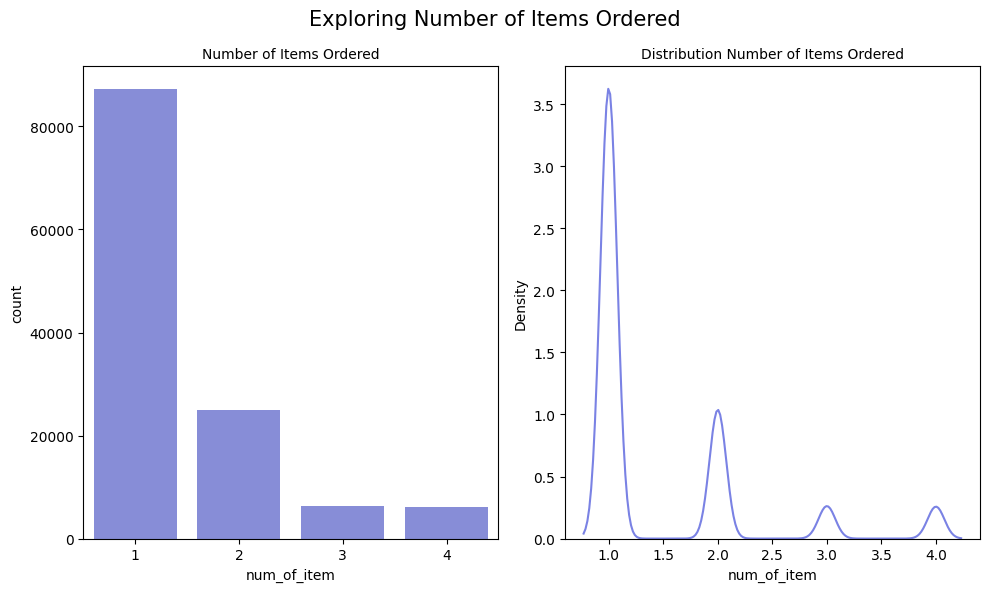

In [35]:
# creatig subplots for number of items
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Exploring Number of Items Ordered', fontsize=15)
# ax = plt.gca()

sns.countplot(ax=axes[0], x='num_of_item', data=orders, color='#7A82E4')
axes[0].set_title('Number of Items Ordered', fontsize=10)

sns.kdeplot(ax=axes[1], data=orders, x='num_of_item', color='#7A82E4')
axes[1].set_title('Distribution Number of Items Ordered', fontsize=10)


plt.tight_layout()
plt.show();

In [36]:
itemsDist = orders['num_of_item'].value_counts()

In [37]:
print(f'There number of orders with 1 item is {itemsDist.iloc[0]}.')
print(f'There number of orders with 2 item is {itemsDist.iloc[1]}.')
print(f'There number of orders with 3 item is {itemsDist.iloc[2]}.')
print(f'There number of orders with 4 item is {itemsDist.iloc[3]}.')

There number of orders with 1 item is 87299.
There number of orders with 2 item is 24957.
There number of orders with 3 item is 6299.
There number of orders with 4 item is 6192.


Most orders items ordered are for a single item. This information presents us with opportunities to establish a recommendation systems to encourage shoppers to add more items to their orders.

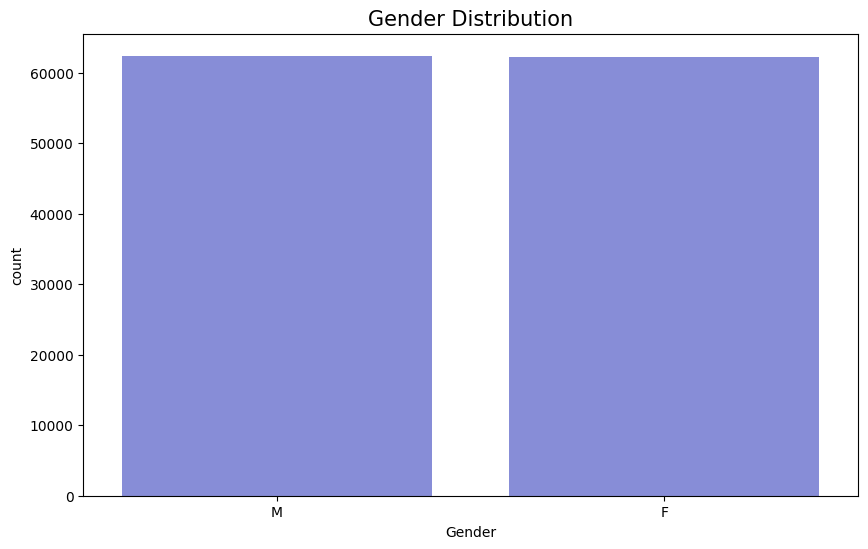

In [38]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(orders['gender'].value_counts(), color='#7A82E4')
plt.xlabel('Gender')
plt.title('Gender Distribution', fontsize=15);

In [39]:
fmdist = orders['gender'].value_counts()
print(f'There is nearly an equal distribution of genders in our data with {fmdist.iloc[0]} Males, and {fmdist.iloc[1]} Female customers.')

There is nearly an equal distribution of genders in our data with 62432 Males, and 62315 Female customers.


#### What are the statuses of the orders?

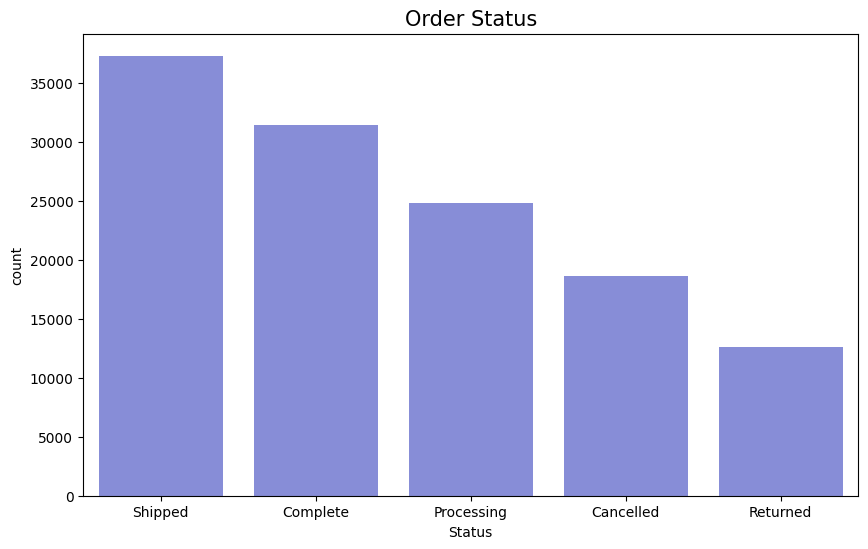

In [40]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(orders['status'].value_counts(), color='#7A82E4')
plt.xlabel('Status')
plt.title('Order Status', fontsize=15);

At the time of retrieving our data, most of the orders statuses were either shipped or completed.

### What is the average order value per each number of items in orders?

In [47]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124747 entries, 0 to 124746
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              124747 non-null  int64  
 1   first_name      124747 non-null  object 
 2   last_name       124747 non-null  object 
 3   email           124747 non-null  object 
 4   age             124747 non-null  int64  
 5   gender          124747 non-null  object 
 6   state           124747 non-null  object 
 7   street_address  124747 non-null  object 
 8   postal_code     124747 non-null  object 
 9   city            124747 non-null  object 
 10  country         124747 non-null  object 
 11  latitude        124747 non-null  float64
 12  longitude       124747 non-null  float64
 13  traffic_source  124747 non-null  object 
 14  created_at      124747 non-null  object 
 15  user_geom       124747 non-null  object 
 16  order_id        124747 non-null  int64  
 17  user_id   

In [46]:
orders.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,latitude,longitude,traffic_source,created_at,user_geom,order_id,user_id,status,shipped_at,num_of_item
0,43158,John,Christensen,johnchristensen@example.com,17,M,Acre,5948 Goodman Union Suite 281,69980-000,city_unknown,...,-8.065346,-72.870949,Display,2019-10-28 10:05:00+00:00,POINT(-72.87094866 -8.065346116),53699,43158,Complete,2023-11-30 00:51:00+00:00,1
1,20002,Lisa,Benton,lisabenton@example.org,60,F,Acre,892 Herman Drive Suite 544,69980-000,city_unknown,...,-8.065346,-72.870949,Search,2021-03-12 04:10:00+00:00,POINT(-72.87094866 -8.065346116),24826,20002,Processing,shipped_at_unknown,1
2,79621,Alexandria,Rodriguez,alexandriarodriguez@example.com,23,F,Acre,92083 Bradford Pass Apt. 622,69980-000,city_unknown,...,-8.065346,-72.870949,Search,2023-10-06 17:54:00+00:00,POINT(-72.87094866 -8.065346116),99312,79621,Returned,2024-08-18 16:56:00+00:00,1
3,67295,Edward,Riggs,edwardriggs@example.org,57,M,Acre,7705 Meyer Causeway,69980-000,city_unknown,...,-8.065346,-72.870949,Search,2019-04-24 14:59:00+00:00,POINT(-72.87094866 -8.065346116),83915,67295,Complete,2021-10-06 02:34:00+00:00,1
4,27421,Steven,Bolton,stevenbolton@example.com,43,M,Acre,7982 David Oval Apt. 145,69980-000,city_unknown,...,-8.065346,-72.870949,Search,2021-11-30 00:46:00+00:00,POINT(-72.87094866 -8.065346116),34018,27421,Complete,2024-01-03 20:08:00+00:00,1


In [49]:
orders['traffic_source'].value_counts()

,count
traffic_source,
Search,87039
Organic,18913
Facebook,7463
Email,6332
Display,5000


#### Parts of the exploration:

**Customer persona + clustering customer segmentation**
Who are the loyal customers?
What is the average age? gender?
Which country has the most orders? Which states? Do the customer personas vary?
Extract and build a model that can group customers together based on spending or customer demographic?

**Marketing evaluation + A/B Testing**
Did customer using a particular browser order more items than others?
Does browser matter?
A/B Testing for different browser types

Need to merge:
* order + users ✔ # user demographic + order status
* events # browser + session information # marketing analysis
* from order_items need sale_price # revenue + profit analysis
* products # cost, retail_price, category
